# Pizza Restaurant Sales  / Penjualan Restoran Pizza
---

Exploratory Data Analysis terkait penjualan restoran pizza

#### Dibuat oleh : **Damar Djati Wahyu Kemala**


## Tentang Dataset

### Dataset terdiri dari:

| Keterangan| Jumlah |
| ----------| ------ |
| Kolom     | 12     |
| Baris     | 48620  |

### Asal Dataset
---
| Owner Datasets   | Sumber Datasets | Link Datasets |
| -------------   | -------------- | ------------ |
| Shi Long Zhuang | Kaggle         | [Pizza-Sales](https://www.kaggle.com/datasets/shilongzhuang/pizza-sales?resource=download)  |

### Dengan keterangan masing-masing kolom:
---

* `order_id`: Key Unik yang berisi nomor meja pemesanan pizza

* `order_details_id`: Key unik yang berisi nomor pemesanan detail pizza (seperti ukuran dan tipe pizza yang sama akan ditempatkan dalam satu baris yang sama, dan jumlah yang dipesan otomatis bertambah banyak)

* `pizza_id`: Key Unik yang mengidektifikasikan pizza yang dipesan baik dari details seperti ukuran dan harga

* `quantity`: Jumlah pemesanan setiap pizza dengan tipe dan ukuran yang sama

* `order_date`: Tanggal pesan pizza

* `order_time`: Waktu pemesanan pizza

* `unit_price`: Harga pizza dalam US Dollar

* `total_price`: **unit_price** * **quantity**

* `pizza_size`: Ukuran pizza (Small, Medium, Large, X Large, or XX Large)

* `pizza_type`: Jenis pizza.

* `pizza_ingredients`: Bahan yang digunakan untuk membuat pizza dan tertera pada menu (Mereka memasukan semuanya dengan toping Mozzarella Cheese, meskipun tidak disebutkan secara spesifik; dan memasukan semua pizza dengan Saus Tomat, kecuali jika saus lain ditentukan)

* `pizza_name`: Nama pizza yang tertampil pada menu pesanan

## Tantangan / Studi Kasus

Kita telah mengumpulkan data transaksi pada tahun terakhir, namun belum benar-benar bisa memanfaatkannya dengan baik. Dan berharap anda dapat menganalisa data ini dan memasukannya kedalam report/laporan agar dapat membantu menemukan peluang untuk meningkatkan penjualan dan bekerja lebih efisien.

Ini ada beberapa pertayaan yang perlu untuk dijawab:

* Hari dan waktu apa kita benar-benar sangat sibuk?
* Berapa banyak pizza yang kita buat selama periode puncak/klimak?
* Apa pizza terbaik dan terlaris dari kami?

Ini semua yang dapat saya pikirkan sampai sekarang, tapi jika anda punya ide lain, saya suka untuk mendengarkannya.

Terimakasih,

Mario Maven (Manager, Plato's Pizza)

---


## Import Library

In [ ]:
# Load Data
from google.colab import files

# Process Data
import pandas as pd
import wordcloud

# Viz Data
import matplotlib.pyplot as plt
import plotly.express as pltex  #plotly R
import seaborn as sns

## Upload Dataset File

In [ ]:
DataPizzaUploaded = files.upload()

Saving Data Model - Pizza Sales.xlsx to Data Model - Pizza Sales.xlsx


## Read Data

In [ ]:
df_pizza = pd.read_excel("Data Model - Pizza Sales.xlsx")

df_pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Explore Data

In [ ]:
# Mengecek kolom pada dataset pizza
df_pizza.keys()

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
# Tipe Data pada masing-masing kolom dataset pizza
df_pizza.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [ ]:
# Ukuran Baris dan Kolom
df_pizza.shape

(48620, 12)

In [ ]:
# Cek null values pada dataset
df_pizza.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
# Cek statistik deskriptif
df_pizza.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


Data terlihat cukup rapi, sehingga proses cleaning dilewati dan langsung menuju ke proses analisis

                  order_details_id  order_id  quantity  unit_price  \
order_details_id          1.000000  0.999990  0.003639   -0.003286   
order_id                  0.999990  1.000000  0.003621   -0.003323   
quantity                  0.003639  0.003621  1.000000    0.007142   
unit_price               -0.003286 -0.003323  0.007142    1.000000   
total_price              -0.000847 -0.000889  0.541926    0.836087   

                  total_price  
order_details_id    -0.000847  
order_id            -0.000889  
quantity             0.541926  
unit_price           0.836087  
total_price          1.000000  


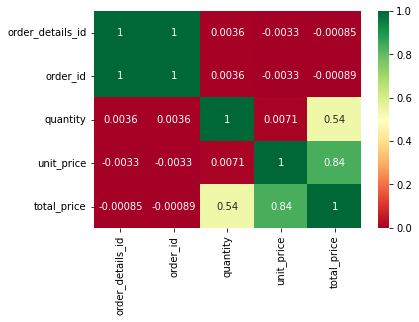

In [ ]:
# Cek Korelasi antar kolom pada dataset
print(df_pizza.corr())

sns.heatmap(df_pizza.corr(), annot=True, cmap="RdYlGn")

plt.show()

## Analysis

In [ ]:
# Melihat jumlah pesanan per harinya
df_pizza['nama_hari'] = df_pizza['order_date'].dt.day_name()

df_pizza['nama_hari'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: nama_hari, dtype: int64

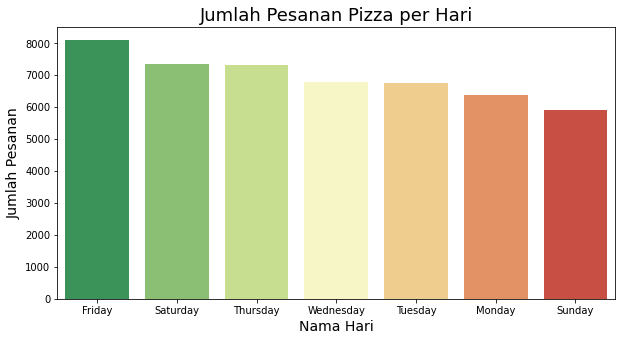

In [ ]:
# Viz terkait jumlah pesanan per harinya
plt.figure(figsize = (10, 5))

sns.countplot(data=df_pizza, x="nama_hari", 
              order = df_pizza['nama_hari'].value_counts().index, 
              palette="RdYlGn_r")
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xlabel('Nama Hari', fontsize=14)
plt.title('Jumlah Pesanan Pizza per Hari', fontsize=18)

plt.show()

In [ ]:
# Waktu atau jam saat karyawan benar-benar sibuk akan pesanan pizza
df_pizza[['Jam', 'Menit', 'Detik']] = df_pizza['order_time'].astype("string").str.split(":", expand = True)

df_pizza['Jam'].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: Jam, dtype: Int64

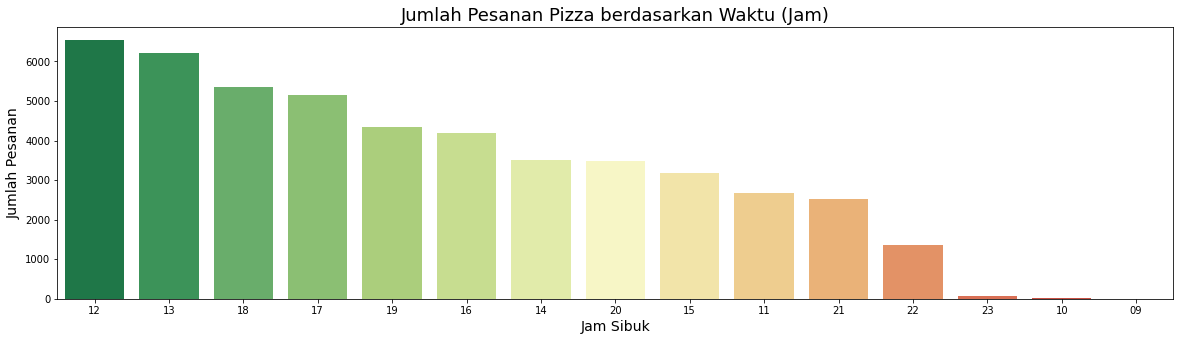

In [ ]:
# Viz Jam atau pukul berapa karyawan Plato's pizza sibuk.
plt.figure(figsize = (20, 5))

sns.countplot(data=df_pizza, x="Jam", 
              order = df_pizza['Jam'].value_counts().index, 
              palette="RdYlGn_r")
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xlabel('Jam Sibuk', fontsize=14)
plt.title('Jumlah Pesanan Pizza berdasarkan Waktu (Jam)', fontsize=18)

plt.show()

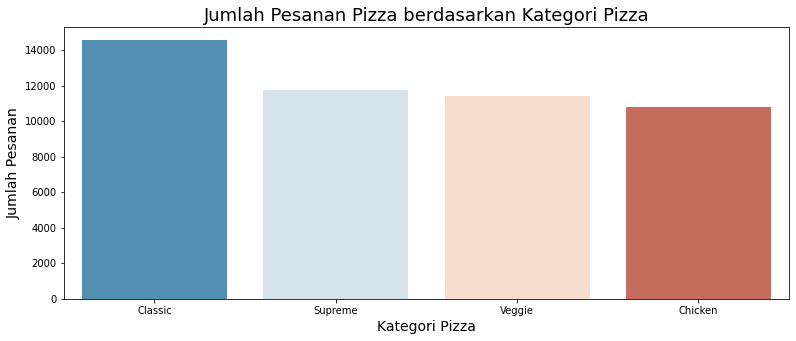

In [ ]:
# Pizza terbaik dan terlaris
plt.figure(figsize = (13, 5))

sns.countplot(data=df_pizza, x="pizza_category",
              order = df_pizza['pizza_category'].value_counts().index, 
              palette="RdBu_r")
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xlabel('Kategori Pizza', fontsize=14)
plt.title('Jumlah Pesanan Pizza berdasarkan Kategori Pizza', fontsize=18)

plt.show()

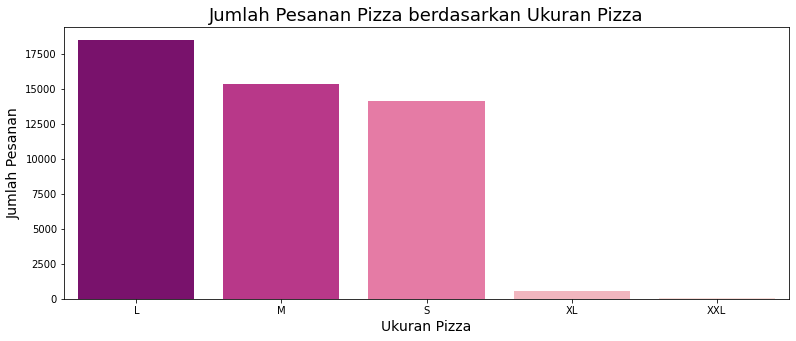

In [ ]:
# Pizza terbaik dan terlaris
plt.figure(figsize = (13, 5))

sns.countplot(data=df_pizza, x="pizza_size",
              order = df_pizza['pizza_size'].value_counts().index, 
              palette="RdPu_r")
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xlabel('Ukuran Pizza', fontsize=14)
plt.title('Jumlah Pesanan Pizza berdasarkan Ukuran Pizza', fontsize=18)

plt.show()

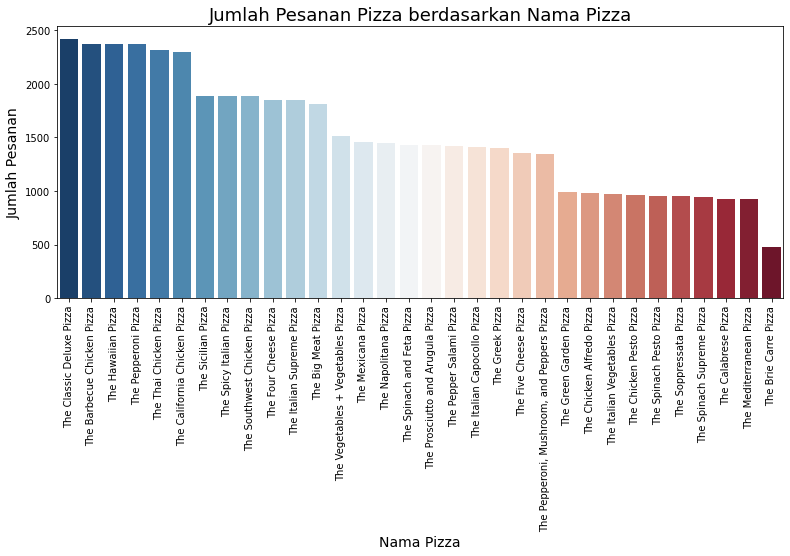

In [ ]:
# Pizza terbaik dan terlaris
plt.figure(figsize = (13, 5))

sns.countplot(data=df_pizza, x="pizza_name",
              order = df_pizza['pizza_name'].value_counts().index, 
              palette="RdBu_r")
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xlabel('Nama Pizza', fontsize=14)
plt.xticks(rotation=90)
plt.title('Jumlah Pesanan Pizza berdasarkan Nama Pizza', fontsize=18)

plt.show()

In [ ]:
# Pizza terbaik dan terlaris
df_pizza['pizza_name'].value_counts().head()


The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: pizza_name, dtype: int64

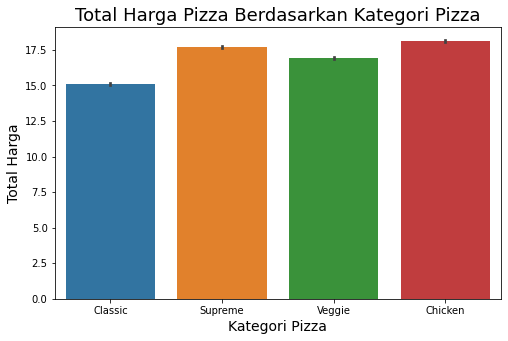

In [ ]:
# Pendapatan total harga pizza berdasarkan kategori pizza
plt.figure(figsize=(8,5))

sns.barplot(data=df_pizza, x="pizza_category", y="total_price",
            order = df_pizza['pizza_category'].value_counts().index)
plt.xlabel("Kategori Pizza", fontsize=14)
plt.ylabel("Total Harga", fontsize=14)
plt.title("Total Harga Pizza Berdasarkan Kategori Pizza", fontsize=18)

plt.show()


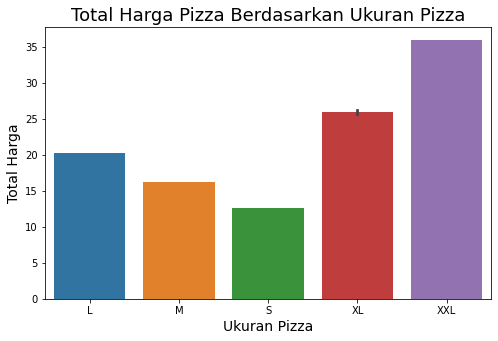

In [ ]:
# Pendapatan total harga pizza berdasarkan ukuran pizza
plt.figure(figsize=(8,5))

sns.barplot(data=df_pizza, x="pizza_size", y="total_price",
            order = df_pizza['pizza_size'].value_counts().index)
plt.xlabel("Ukuran Pizza", fontsize=14)
plt.ylabel("Total Harga", fontsize=14)
plt.title("Total Harga Pizza Berdasarkan Ukuran Pizza", fontsize=18)

plt.show()

## Selesai